Mounted at /content/drive
First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Column Information:
<class 'pandas.core.frame.DataFrame

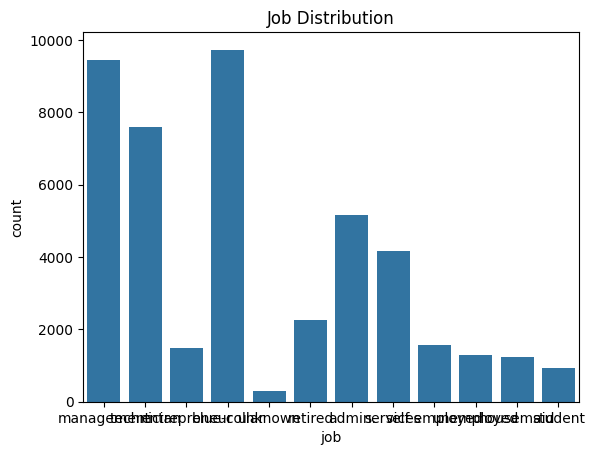

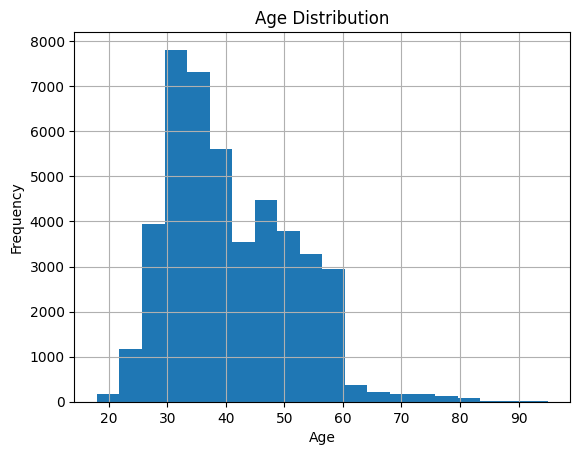


Training Random Forest Classifier...
Epoch 1/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8858 - loss: 0.3062 - val_accuracy: 0.9044 - val_loss: 0.2216
Epoch 2/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8962 - loss: 0.2359 - val_accuracy: 0.9056 - val_loss: 0.2177
Epoch 3/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9009 - loss: 0.2264 - val_accuracy: 0.9064 - val_loss: 0.2138
Epoch 4/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9021 - loss: 0.2117 - val_accuracy: 0.9084 - val_loss: 0.2125
Epoch 5/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9012 - loss: 0.2121 - val_accuracy: 0.9058 - val_loss: 0.2124
Epoch 6/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9076 - loss: 0.2055 - val_accuracy: 0.9051 - val_loss: 0.2107
Epoch 7/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9066 - loss: 0.2009 - val_accuracy: 0.9086 - val_loss: 0.2100
Epoch 8/20
566/566 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.

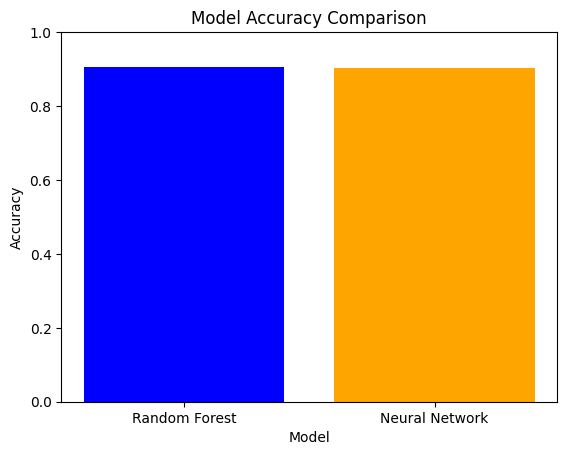


Summary of Results:
            Model  Accuracy
0   Random Forest  0.904981
1  Neural Network  0.902194


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt

# Mount Google Drive (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
data_set = '/content/drive/My Drive/Assignments/ML_CW_Mindiya/bank-full.csv'

# Load dataset
try:
    data = pd.read_csv(data_set, sep=';', engine='python')
except FileNotFoundError:
    print(f"File not found at {data_set}. Please check the path.")
    exit()

# Display basic data information
print("First 5 rows of the dataset:")
print(data.head())

print("\nColumn Information:")
data.info()

print("\nStatistical Summary:")
print(data.describe())

# Encode target variable and categorical features
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
data_encoded = pd.get_dummies(data, drop_first=True)

# Visualize job distribution
sns.countplot(x='job', data=data)
plt.title('Job Distribution')
plt.show()

# Visualize age distribution
data['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Feature and target split
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Convert to NumPy arrays for TensorFlow
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Train-test split (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Model
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Neural Network Model
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Evaluate Neural Network
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("\nNeural Network Accuracy:", nn_accuracy)
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Accuracy Comparison Visualization
model_names = ['Random Forest', 'Neural Network']
accuracies = [rf_accuracy, nn_accuracy]

plt.bar(model_names, accuracies, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Summary Results
results = pd.DataFrame({
    "Model": ["Random Forest", "Neural Network"],
    "Accuracy": [rf_accuracy, nn_accuracy]
})

print("\nSummary of Results:")
print(results)